In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Read the CSV file
df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/user_demand_cambridge_oct7_2019_week.csv')
df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/food_demand_cambridge_week.csv')

In [5]:
df_user.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'start_building', 'start_lon', 'start_lat',
       'target_building', 'target_lon', 'target_lat', 'start_time',
       'target_time', 'withinC', 'withinCend'],
      dtype='object')

In [6]:
df_user_pt = df_user[['start_lat','start_lon']]
df_food_pt = df_food[['start_latitude','start_longitude']]

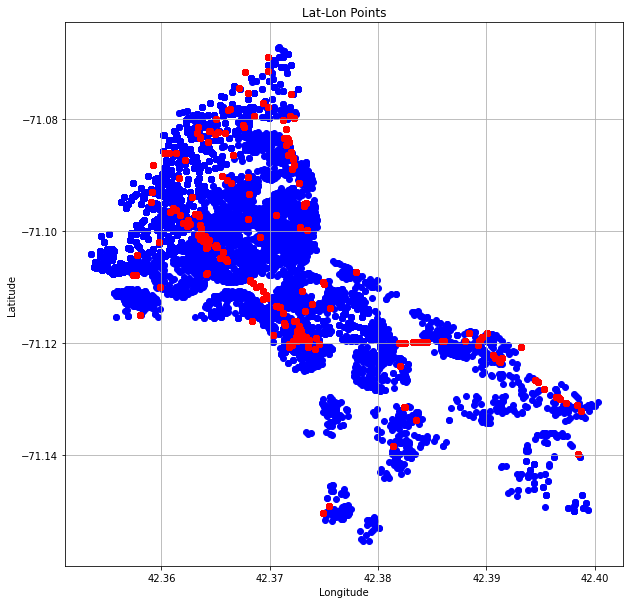

In [11]:
# Create a scatter plot
plt.figure(figsize=(10, 10)) 
plt.scatter(df_user_pt['start_lat'], df_user_pt['start_lon'], color='blue', marker='o')
plt.scatter(df_food_pt['start_latitude'], df_food_pt['start_longitude'], color='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat-Lon Points')
plt.grid(True)
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


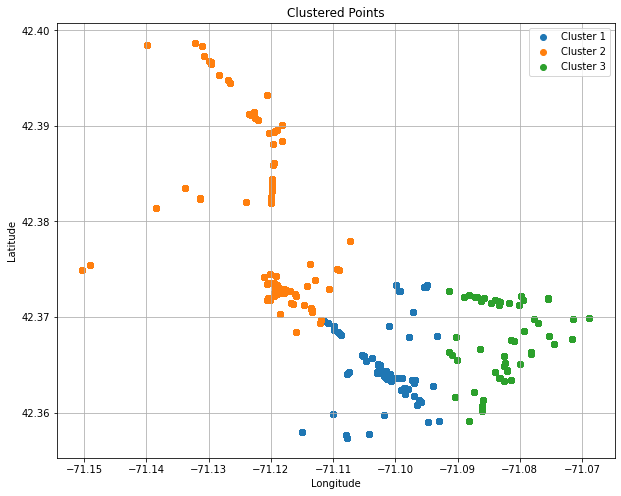

In [15]:
##FOOD CLUSTERS###


# Number of clusters
num_clusters = 3  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_food_pt['cluster'] = kmeans.fit_predict(df_food_pt[['start_latitude', 'start_longitude']])

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_food_pt[df_food_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_longitude'], cluster_points['start_latitude'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Points')
plt.grid(True)
plt.legend()
plt.show()


KMeans(n_clusters=20, random_state=0)


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


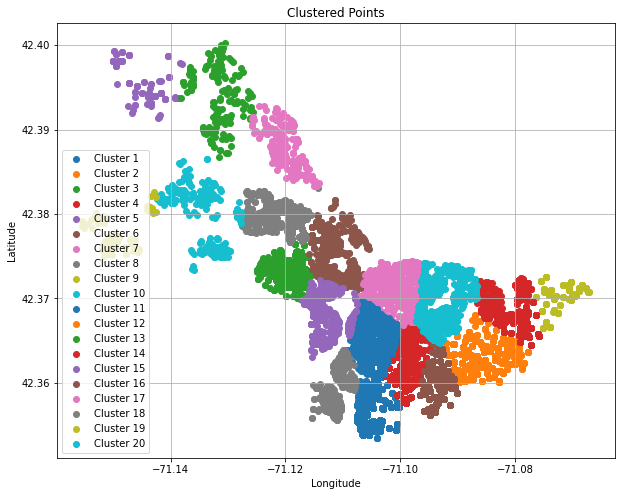

In [27]:
##FOOD CLUSTERS###


# Number of clusters
num_clusters = 4  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
print(kmeans)
df_user_pt['cluster'] = kmeans.fit_predict(df_user_pt[['start_lat', 'start_lon']])

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_user_pt[df_user_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_lon'], cluster_points['start_lat'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Points')
plt.grid(True)
plt.legend()
plt.show()

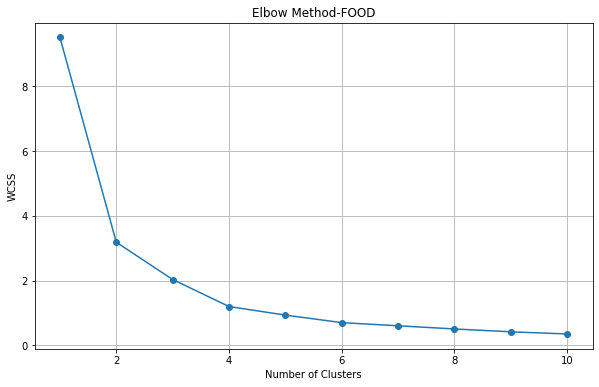

In [19]:
# Calculate WCSS for different number of clusters
wcss = []
for num_clusters in range(1, 11):  # You can adjust the range of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df_food_pt[['start_latitude', 'start_longitude']])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method-FOOD')
plt.grid(True)
plt.show()

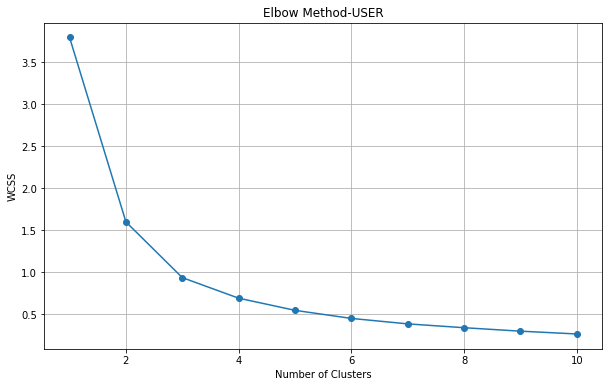

In [20]:
# Calculate WCSS for different number of clusters
wcss = []
for num_clusters in range(1, 11):  # You can adjust the range of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df_user_pt[['start_lat', 'start_lon']])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method-USER')
plt.grid(True)
plt.show()